In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pandas.api.types as  ptypes
# from google.colab import files
# uploaded = files.upload()
%matplotlib inline

In [20]:
# read weatherHistory.csv file
dataset = pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [21]:
dataset.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [22]:
# rename column Apparent Temperature
dataset.rename(columns={'Apparent Temperature (C)':'x','Humidity':'y'},inplace = True)

In [23]:
# getting column x and y in dataset
dataset = dataset.loc[:,['x','y']]
dataset.head()

,x,y
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [24]:
dataset.describe()

,x,y
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
x    96453 non-null float64
y    96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [26]:
# calculating  sum of null values
dataset.isna().sum()

x    0
y    0
dtype: int64

In [27]:
# replace  NaN values with mean value
dataset.replace(np.NaN,dataset.mean(),inplace=True)

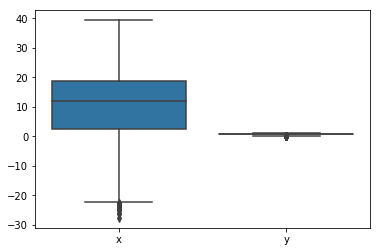

In [28]:
# boxplot to  find outliers of datatset
sb.boxplot(data = dataset)

In [31]:
def feature_scaling(dataset):
    for name in dataset.columns:
        dataset[name] = (dataset[name] - dataset[name].min()) / (dataset[name].max()-dataset[name].min())
    return dataset

In [32]:
# feature  scaling
dataset = feature_scaling(dataset)

In [33]:
# split dataset into train data and test data
def train_and_test_dataset(dataset):
#         calculate train dataset percentage for train model
        train_per = 0.70*len(dataset)
        train_per = int(train_per)
#         calculate test dataset percentage for test train model         
        test_per = len(dataset)-train_per
#         getting trained data from dataset
        X_train_set = dataset.head(train_per)
#         getting test data for testing train model
        Y_train_set = dataset.tail(test_per)
        return X_train_set,Y_train_set

In [34]:
train,test = train_and_test_dataset(dataset)
train_data = train
test_data = test

In [42]:
class LinearRegression:
    def gradient_descent(self,learning_rate,theta_0,theta_1,epoch,x_data,y_data):
        cost = np.empty(0)
        h1 = h2 =0
        
        for i in  range(epoch):
            for data  in range(len(x_data)):
                hypo = theta_0 + (theta_1 * x_data[data])
                h1 += (hypo - y_data[data])
                h2 += ((hypo - y_data[data]) * x_data[data])           
            theta_0 = theta_0 - ((learning_rate * h1) / len(x_data))
            theta_1 = theta_1 - ((learning_rate * h2) / len(x_data))
        return theta_0,theta_1

    def test(self, x_test_data, theta_0, theta_1):
        y_predict = [0]*len(x_test_data)
        for i in range(len(x_test_data)):
    #             y_predict[i] = theta_1*x_test_data[i] + theta_0
              y_predict[i] = (theta_0 + (theta_1*x_test_data[i]))
        return y_predict

    def accuracy(self, y_test_data, y_predicted):
        diff = 0
        for i in range(len(y_test_data)):
            diff += abs((y_predicted[i] - y_test_data[i])/y_test_data[i])
        diff  =  (diff/len(y_test_data))
        data_accuracy = 1 - diff
        return data_accuracy*100       



def main():
    obj =LinearRegression()
    learning_rate = 0.01
    theta_0 = 0.5
    theat_1 = 0.5
    epoch = 1000
    x_train_data = np.array(train_data["x"])
    y_train_data = np.array(train_data["y"])

    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])

#     calculate gradient descent on train data for test data
    t_0, t_1= obj.gradient_descent(learning_rate,theta_0,theat_1,epoch,x_train_data,y_train_data)
    print(t_0,t_1)

#     test data over train data 
    y_prediction_test =obj.test(x_test_data,t_0,t_1)

#     get accuracy of predicted value to original value
    accuracy = obj.accuracy(y_test_data,y_prediction_test)


    print("Accuracy:",accuracy)

if __name__ == '__main__':
    main()

1.2260957346738728 -0.9656880765163406
Accuracy: 79.81761354429133
